In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/test.csv
/kaggle/input/tweet-sentiment-extraction/train.csv


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


In [5]:
train = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')
test = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')
ss = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/sample_submission.csv')


### **Cleaning Dataset** ##

In [6]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
#Chosing only postive and negative sentiments only
train=train[train.sentiment!='neutral']
train.head(5)

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive


In [8]:
train.dtypes

textID           object
text             object
selected_text    object
sentiment        object
dtype: object

In [9]:
train.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

### **Cleaning Text Data**

In [10]:
#Function for cleaning textual data

import re
import string

def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text
train['text']=train['text'].apply(lambda x:clean(x))
train['selected_text']=train['selected_text'].apply(lambda x:clean(x))
train.head(5)

,textID,text,selected_text,sentiment
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive


In [11]:
#defining list of al stopwords

sw=set(stopwords.words('english'))

In [12]:
#finding out all positive words
def tok(text):
    text=text.split()
    text=[w for w in text if not w in sw]
    return text
    
train['text']=train['text'].apply(lambda x:tok(x))


In [13]:
train

,textID,text,selected_text,sentiment
1,549e992a42,"[sooo, sad, miss, san, diego]",sooo sad,negative
2,088c60f138,"[boss, bullying]",bullying me,negative
3,9642c003ef,"[interview, leave, alone]",leave me alone,negative
4,358bd9e861,"[sons, couldnt, put, releases, already, bought]",sons of,negative
6,6e0c6d75b1,"[feedings, baby, fun, smiles, coos]",fun,positive
...,...,...,...,...
27475,b78ec00df5,"[enjoy, ur, night]",enjoy,positive
27476,4eac33d1c0,"[wish, could, come, see, u, denver, husband, l...",d lost,negative
27477,4f4c4fc327,"[ive, wondered, rake, client, made, clear, net...",dont force,negative
27478,f67aae2310,"[yay, good, enjoy, break, probably, need, hect...",yay good for both of you,positive


In [14]:
def join(text):
    text=' '.join([i for i in text])
    return text
train['text']=train['text'].apply(lambda x:join(x))

In [15]:
train

,textID,text,selected_text,sentiment
1,549e992a42,sooo sad miss san diego,sooo sad,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,interview leave alone,leave me alone,negative
4,358bd9e861,sons couldnt put releases already bought,sons of,negative
6,6e0c6d75b1,feedings baby fun smiles coos,fun,positive
...,...,...,...,...
27475,b78ec00df5,enjoy ur night,enjoy,positive
27476,4eac33d1c0,wish could come see u denver husband lost job ...,d lost,negative
27477,4f4c4fc327,ive wondered rake client made clear net dont f...,dont force,negative
27478,f67aae2310,yay good enjoy break probably need hectic week...,yay good for both of you,positive


In [57]:
#Getting positive reviews 

pos=train[train.sentiment=='positive']
neg=train[train.sentiment=='negative']

In [69]:
from collections import Counter
def stop_words(text):
    text=str(text).split()
    text=[w for w in text if not w in sw]
    return text

pos['temp']=pos['selected_text'].apply(lambda x:stop_words(x))
top_pos= Counter([item for sublist in pos['temp'] for item in sublist])
top_pos=pd.DataFrame(top_pos.most_common(20))
top_pos.columns=['words','count']



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [105]:
#print("MOST COMMON POSITIVE WORDS :\n",top_pos)

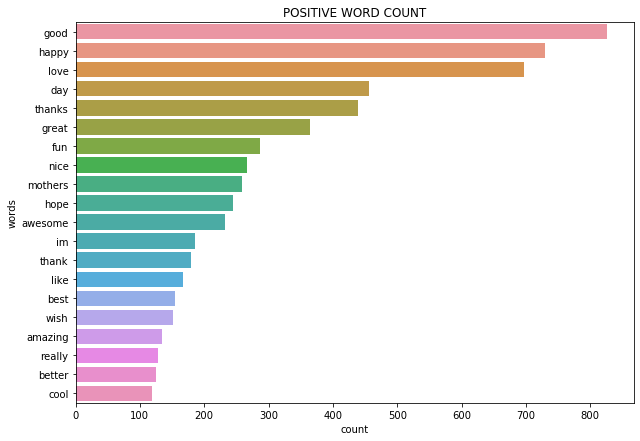

In [104]:
plt.figure(figsize=(10,7))
a=sns.barplot(y='words',x='count',data=top_pos).set_title('POSITIVE WORD COUNT')

In [91]:
neg['temp']=neg['selected_text'].apply(lambda x:stop_words(x))
top_neg= Counter([item for sublist in neg['temp'] for item in sublist])
top_neg=pd.DataFrame(top_neg.most_common(20))
top_neg.columns=['words','count']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
#print("MOST COMMON NEGATIVE WORDS :\n",top_neg)

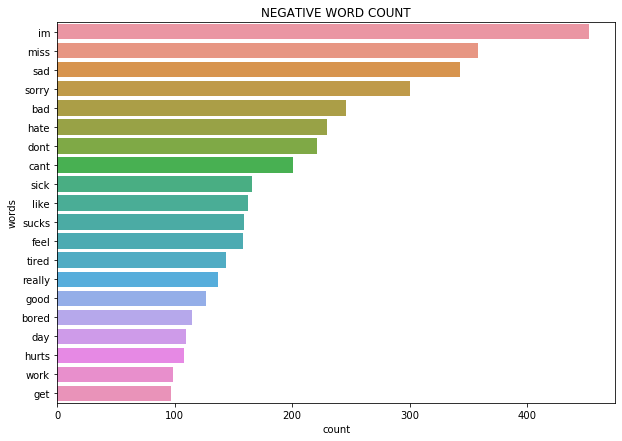

In [107]:
plt.figure(figsize=(10,7))
a=sns.barplot(y='words',x='count',data=top_neg).set_title('NEGATIVE WORD COUNT')

In [159]:
p=list(set(top_pos['words']))
n=list(set(top_neg['words']))

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect=TfidfVectorizer()

X=tfvect.fit_transform(train['selected_text'])
Y=train['sentiment']

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [167]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(pred,y_test)

print('SCORE :',acc)

SCORE : 0.8110486433634808
